<a href="https://www.bigdatauniversity.com"><img align = center src = "https://ibm.box.com/shared/static/wbqvbi6o6ip0vz55ua5gp17g4f1k7ve9.png" width = 400> </a>

# <center> Exercise: Convolution on Images using TensorFlow for Deep Neural Networks (DNN)</center>

This exercise is about learning to apply convolutions on an image using Tensorflow. Idea is to create a weight matrix and apply the function conv2d with 'same' and 'Valid' padding to check the effects on output image. 

To give an overview of how the output changes based on convolution parameters, this exercise is designed to build Layer one of Convolution Neural Network (CNN) along with maxpooling and relu functions and Visualize the outputs given an input image. 

### First, let's import the TensorFlow library and Python dependencies

In [1]:
#Importing
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf

### Read and display image by coverting it to a gray scale.   

Read the input image as float data type as Tensorflow accepts images in float format. 

First download a samole image:

In [11]:
!wget --quiet https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg --output-document bird.jpg


####  Run this Cell to experiment with Lena Image.  RGB with Size (512, 512)

/home/olle/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


Text(0.5,0,u' Gray Scale Image ')

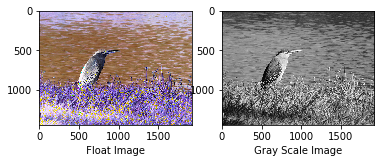

In [13]:
#read the image as Float data type
im=misc.imread("/home/olle/Documents/Helmholtz_zentrum/tensorflow/tutorials/convolution_nn/bird.jpg").astype(np.float)

#im=misc.imread("one.png").astype(np.float)

#Convert image to gray scale
grayim=np.dot(im[...,:3], [0.299, 0.587, 0.114])


#Plot the images
%matplotlib inline

plt.subplot(1, 2, 1)
plt.imshow(im)
plt.xlabel(" Float Image ")

plt.subplot(1, 2, 2)
plt.imshow(grayim, cmap=plt.get_cmap("gray"))
plt.xlabel(" Gray Scale Image ")


#### Run this cell to experiemnt with MNIST image of Number 1. Gray Scale SIze (28, 28)

Print the shape of Gray Scale Image

In [15]:
# Your Code Goes Here
print grayim.shape


(1440, 1920)


<div align="right">
<a href="#printgray" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="printgray" class="collapse">
```
print grayim.shape

```
</div>

### Extend the Dimensions of the Gray Scale Image

For convolution, TensorFlow accepts Images of dimensions:

[num of images, width, height, channels].

In this case we are looking for dimensions of [1,512,512,1] from (512,512).

In [16]:
Image = np.expand_dims(np.expand_dims(grayim, 0), -1)

print Image.shape


(1, 1440, 1920, 1)


### Create Place holder for an input image and Print the Shape

The placeholder takes input in float format and same size of input image

In [25]:
# Your Code Goes Here
img= tf.placeholder(tf.float32, [None,1440,1920,1])
print img.get_shape().as_list()

[None, 1440, 1920, 1]


<div align="right">
<a href="#placeholder" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="placeholder" class="collapse">
```
img= tf.placeholder(tf.float32, [None,512,512,1])
print img.get_shape().as_list()

```
</div>

### Create a Variable for Weight Matrix and Print the Shape

The shape of weight matrix is of the form:
[ Height, widht, Input , Output]. 

In this case lets create weight matrix of size 5 X 5 and keeping number of inputs and output to just 1. So, the shape is of form [5,5,1,1].

In [39]:
# Your Code Goes Here
shape=[5,5,1,1]
weights =tf.Variable(tf.truncated_normal(shape, stddev=2))
print weights.get_shape().as_list()

[5, 5, 1, 1]


<div align="right">
<a href="#Variable" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Variable" class="collapse">
```
shape=[5,5,1,1]
weights =tf.Variable(tf.truncated_normal(shape, stddev=0.05))
print weights.get_shape().as_list()

```
</div>

###  Create Two Convolution Graphs in Tensorflow

lets use the functon tf.nn.conv2d to create a graph for convolution operation with padding 'same' and Padding 'Valid'.

In [40]:
# You Code Goes Here

# for convolution output 1
ConOut= tf.nn.conv2d(img, weights, strides=[1, 1, 1, 1], padding='SAME')

# for convolution output 2
ConOut2= tf.nn.conv2d(img, weights, strides=[1, 1, 1, 1], padding='VALID')




<div align="right">
<a href="#Graph" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Graph" class="collapse">
```
ConOut = tf.nn.conv2d(input=img,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

ConOut2 = tf.nn.conv2d(input=img,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='VALID')
```
</div>

### Initialize all variables and Run the Sessions

In [41]:
init = tf.global_variables_initializer()
sess= tf.Session()
sess.run(init)

Run the sesions to get the results for two convolution operations 

In [42]:
# Your Code Goes Here

result = sess.run(ConOut,feed_dict={img:Image})

result2 = sess.run(ConOut2,feed_dict={img:Image})


<div align="right">
<a href="#Result" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Result" class="collapse">
```
result = sess.run(ConOut,feed_dict={img:Image})

result2 = sess.run(ConOut2,feed_dict={img:Image})
```
</div>

###  Display the output images 

The result of convolution with 'same' padding is of the form [1,512,512,1] and for 'valid' padding image is of the shape [1,508,508,1]. To display the images, our job is to reshape the dimensions in the form (512,512) and (508,508) respectively.

In [43]:

# for the result with 'SAME' Padding 

#reduce the dimension
vec = np.reshape(result, (1, -1));
# Reshape the image
image= np.reshape(vec,(1440,1920))

print image.shape


# for the result with 'VALID' Padding 

#reduce the dimension
vec2 = np.reshape(result2, (1, -1));
# Reshape the image
image2= np.reshape(vec2,(1436,1916))

print image2.shape




(1440, 1920)
(1436, 1916)


Display the images 

Text(0.5,0,u' VALID Padding ')

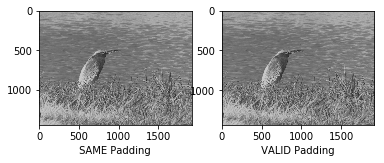

In [44]:
#Plot the images
%matplotlib inline

plt.subplot(1, 2, 1)
plt.imshow(image,cmap=plt.get_cmap("gray"))
plt.xlabel(" SAME Padding ")

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap=plt.get_cmap("gray"))
plt.xlabel(" VALID Padding ")

Feel free to change the weight matrix and experiment with different Paddings to see the changes in output images. 

## Create First Convolution Neural Network Layer


using above conv2d function lets build our first conv Layer. Usually most general CNN architecture Layer 1 comprises of Convolution, Relu and MaxPooling. Lets create these functions to check the effects on "Lena" Image. Depending on the architecture these functions may change. For this exercise lets assume our Layer 1 has just three functions Convolution, Relu and Maxpooling.

It is most often repetation of these layers stacked on top of each other to create Deep CNN


In [47]:
#lets create functions for convolution and Maxpooling

def conv2d (X,W):
    
    #Your Code Goes Here
    return tf.nn.conv2d(input=X,filter=W,strides=[1, 1, 1, 1],padding='SAME')
 

def MaxPool (X):
    
    #Your Code Goes Here
    return tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

<div align="right">
<a href="#Function" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Function" class="collapse">
```
return tf.nn.conv2d(input=X,filter=W,strides=[1, 1, 1, 1],padding='SAME')

return tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
```
</div>

### Create Weights and Biases for Convolution

The weights are of the shape [Height, Width , Input , Output]. Here lets create the weights of size 5X5 which has 1 input and 32 Outputs. 

In [57]:

weights = {
        # 5 x 5 convolution, 1 input image, 32 outputs
        'W_conv1': tf.Variable(tf.random_normal([5, 5, 1, 32]))       
    }

biases = {
        #bias should be of the size of number of Outputs
        'b_conv1': tf.Variable(tf.random_normal([32]))        
    }
     
    

<div align="right">
<a href="#Weights" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Weights" class="collapse">
```
 'W_conv1': tf.Variable(tf.random_normal([5, 5, 1, 32]))

 'b_conv1': tf.Variable(tf.random_normal([32]))
```
</div>

### Define a TensorFlow Graph for Relu, Convolution and Maxpooling

The output of Conv2d is passed through Relu Layer and finally, the output of Relu is given as input for Maxpooling layer. Let's define the graph and print the shapes.The size of Image is reduced after passing through Maxpool Layer. You can change the size and strides in Maxpool layer to check how the image size varies 


In [58]:

conv1 = tf.nn.relu(conv2d(img, weights['W_conv1']) + biases['b_conv1'])

Mxpool = MaxPool(conv1)

    
print conv1.get_shape().as_list()

print Mxpool.get_shape().as_list()

[None, 1440, 1920, 32]
[None, 720, 960, 32]


<div align="right">
<a href="#Conv" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Conv" class="collapse">
```
tf.nn.relu(conv2d(img, weights['W_conv1']) + biases['b_conv1'])

MaxPool (conv1)
```
</div>

### Initialize all TensorFlow Variables and Run the Session

In [60]:

init = tf.global_variables_initializer()
sess= tf.Session()
sess.run(init)

### Run session to get the output of Layer 1 

The session is run on MxPool which will be the final output 

In [66]:
Layer1 =sess.run(Mxpool,feed_dict={img:Image})
Layer1.shape

(1, 720, 960, 32)

<div align="right">
<a href="#Result123" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="Result123" class="collapse">
```
sess.run(Mxpool,feed_dict={img:Image})


```
</div>

### Visualize the Output of Convolution layer1 

(1, 720, 960, 32)
(720, 960, 32)


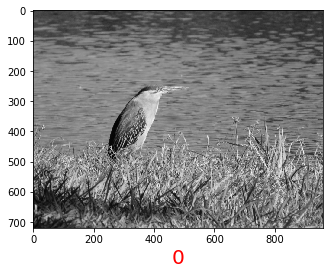

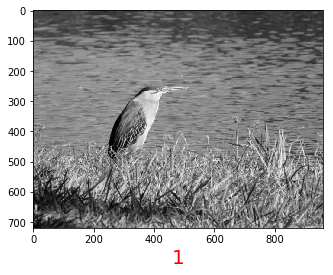

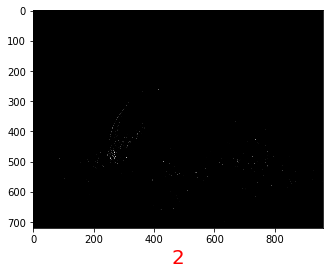

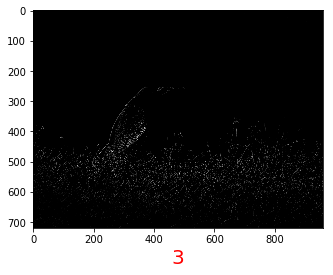

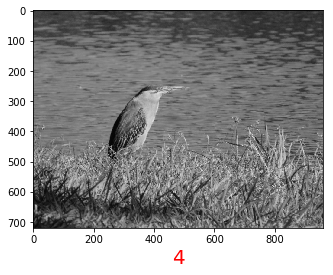

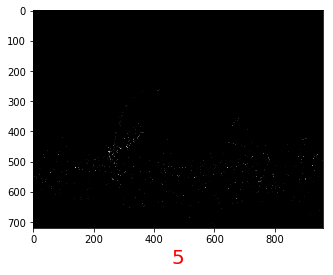

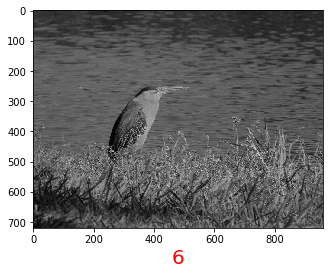

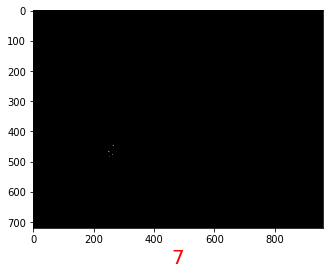

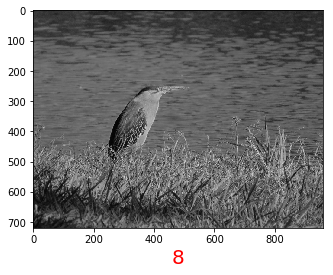

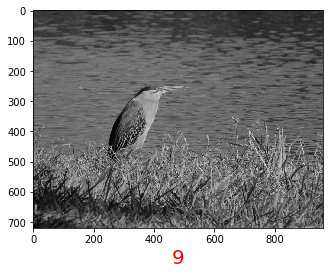

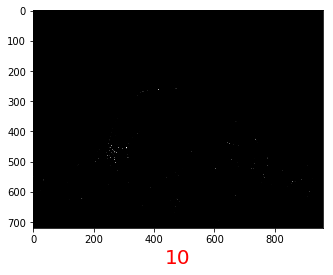

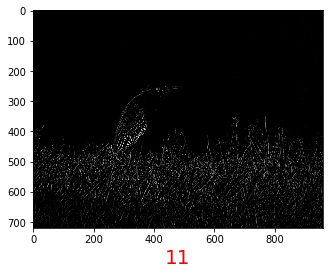

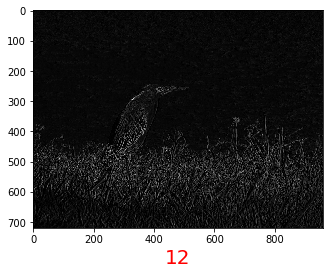

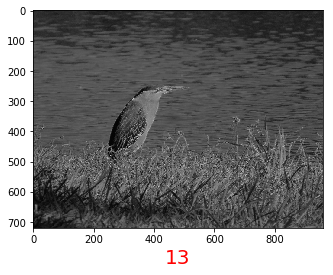

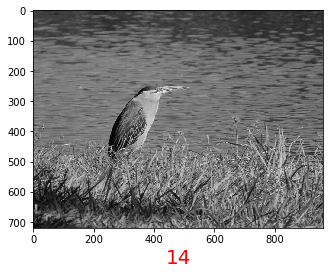

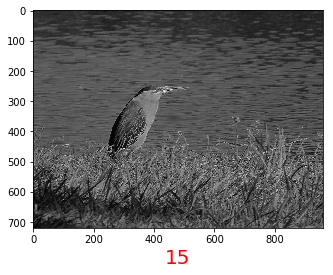

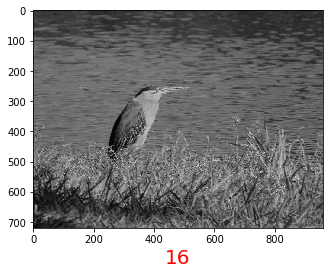

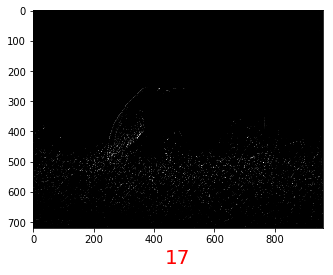

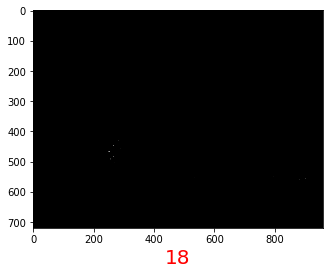

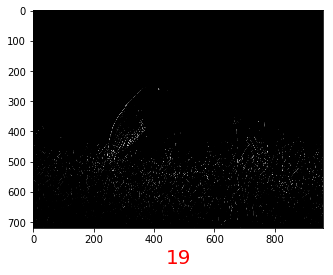

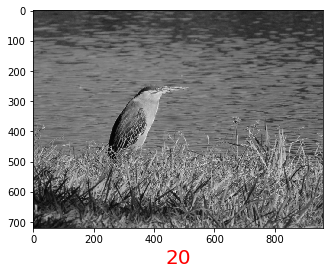

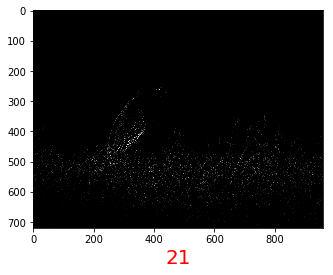

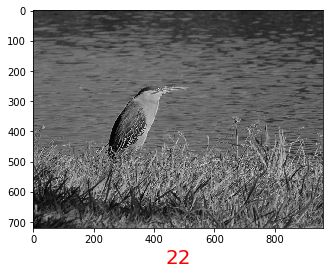

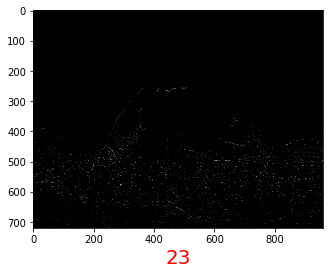

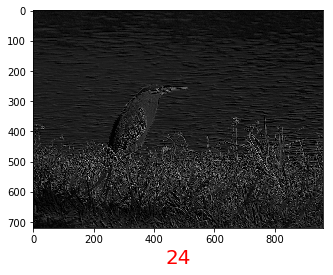

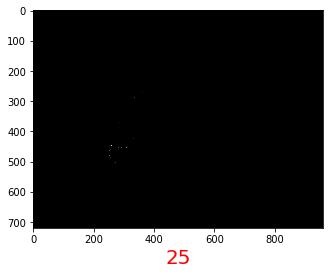

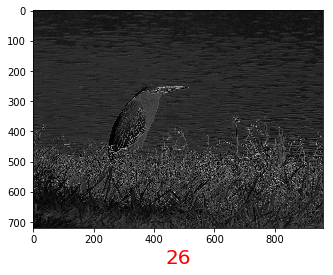

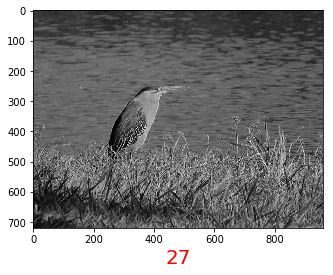

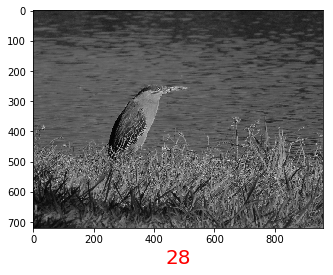

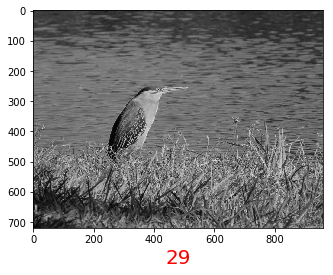

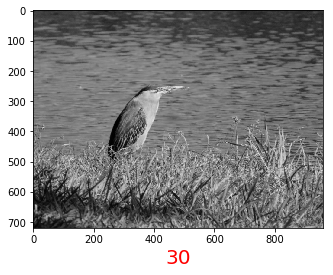

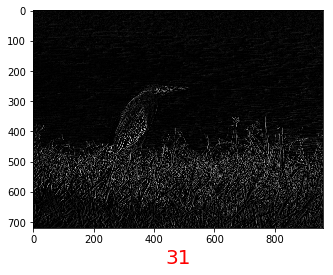

In [67]:
print Layer1.shape

vec = np.reshape(Layer1, (720,960,32));
print vec.shape

for i in range (32):
    
    image=vec[:,:,i]
    #print image
    #image *= 255.0/image.max() 
    #print image
    plt.imshow(image,cmap=plt.get_cmap("gray"))
    plt.xlabel( i , fontsize=20, color='red')
    plt.show()
    plt.close()


Please feel free to experiemnt with different values of: Padding, Kernel Size to see how the output varies

The Idea behind this exercise is to gain understanding on how to apply convolutions and other functions on Images. We are NOT training Neural Network here, however just checking the effects of changing parameters of the above functions which are basic building blocks of any Deep Convolution neural Networks.  

## Want to learn more?

Running deep learning programs usually needs a high performance platform. PowerAI speeds up deep learning and AI. Built on IBM's Power Systems, PowerAI is a scalable software platform that accelerates deep learning and AI with blazing performance for individual users or enterprises. The PowerAI platform supports popular machine learning libraries and dependencies including Tensorflow, Caffe, Torch, and Theano. You can download a [free version of PowerAI](https://cocl.us/ML0120EN_PAI).

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0120EN_DSX)This is the end of this lesson. Hopefully, now you have a deeper and intuitive understanding regarding the LSTM model. Thank you for reading this notebook, and good luck on your studies.

## Thank You Completing This Exercise 

Created by <a href = "https://ca.linkedin.com/in/shashibushan-yenkanchi"> Shashibushan Yenkanchi </a> </h4>
<hr>
Copyright &copy; 2016 [Big Data University](https://bigdatauniversity.com/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).